In [209]:
#imports
import pandas as pd
from scipy import stats
import numpy as np

In [269]:
df = pd.read_csv("C:/Users/serav/Documents/UBC/SUMMER 2021/TERM 2/DATA 301/project-group-30/data/raw/police_killings.csv", encoding = "ISO-8859-1")
df

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,William Chapman II,18,Male,Black,April,22,2015,1098 Frederick Blvd,Portsmouth,VA,...,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.152047,0.120553
463,William Dick III,28,Male,Native American,April,4,2015,Bureau of Indian Affairs Rd 66,Tonasket,WA,...,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.133650,0.174525
464,William Poole,52,Male,White,March,16,2015,130 Wedowee Ln,Gaston,NC,...,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.256150,0.072764
465,Yuvette Henderson,38,Female,Black,February,3,2015,3800 Hollis St,Oakland,CA,...,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.069601,0.396476


In [270]:
#remove 14 columns

df = df.drop(['name', 'day', 'year', 'streetaddress', 'city', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency'], axis =1)
df

,age,gender,raceethnicity,month,state,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,16,Male,Black,February,AL,Gunshot,No,3779,60.5,30.5,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,27,Male,White,April,LA,Gunshot,No,2769,53.8,36.2,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,26,Male,White,March,WI,Gunshot,No,4079,73.8,7.7,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,25,Male,Hispanic/Latino,March,CA,Gunshot,Firearm,4343,1.2,0.6,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,29,Male,White,March,OH,Gunshot,No,6809,92.5,1.4,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,18,Male,Black,April,VA,Gunshot,No,1640,40.9,53.8,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.152047,0.120553
463,28,Male,Native American,April,WA,Taser,Firearm,4154,74.5,0.4,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.133650,0.174525
464,52,Male,White,March,NC,Gunshot,Firearm,3850,83.2,10.1,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.256150,0.072764
465,38,Female,Black,February,CA,Gunshot,Firearm,2544,21.7,24.9,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.069601,0.396476


In [271]:
#remove rows with missing values

df = df.dropna().reset_index(drop=True) 
df

,age,gender,raceethnicity,month,state,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,16,Male,Black,February,AL,Gunshot,No,3779,60.5,30.5,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,27,Male,White,April,LA,Gunshot,No,2769,53.8,36.2,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,26,Male,White,March,WI,Gunshot,No,4079,73.8,7.7,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,25,Male,Hispanic/Latino,March,CA,Gunshot,Firearm,4343,1.2,0.6,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,29,Male,White,March,OH,Gunshot,No,6809,92.5,1.4,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,18,Male,Black,April,VA,Gunshot,No,1640,40.9,53.8,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.152047,0.120553
436,28,Male,Native American,April,WA,Taser,Firearm,4154,74.5,0.4,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.133650,0.174525
437,52,Male,White,March,NC,Gunshot,Firearm,3850,83.2,10.1,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.256150,0.072764
438,38,Female,Black,February,CA,Gunshot,Firearm,2544,21.7,24.9,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.069601,0.396476


In [272]:
#remove rows that have 'age'='Unkown'

indexNames = df[df['age'] == 'Unknown' ].index
df= df.drop(index=indexNames)
df

,age,gender,raceethnicity,month,state,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,16,Male,Black,February,AL,Gunshot,No,3779,60.5,30.5,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,27,Male,White,April,LA,Gunshot,No,2769,53.8,36.2,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,26,Male,White,March,WI,Gunshot,No,4079,73.8,7.7,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,25,Male,Hispanic/Latino,March,CA,Gunshot,Firearm,4343,1.2,0.6,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,29,Male,White,March,OH,Gunshot,No,6809,92.5,1.4,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,18,Male,Black,April,VA,Gunshot,No,1640,40.9,53.8,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.152047,0.120553
436,28,Male,Native American,April,WA,Taser,Firearm,4154,74.5,0.4,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.133650,0.174525
437,52,Male,White,March,NC,Gunshot,Firearm,3850,83.2,10.1,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.256150,0.072764
438,38,Female,Black,February,CA,Gunshot,Firearm,2544,21.7,24.9,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.069601,0.396476


In [273]:
#change data type of 'age' and 'p_income' into integer

df["age"] = df['age'].astype('int')
df["p_income"] = df['p_income'].astype('int')

#round data in 'urate' to 2 decimal places
df['urate']=df['urate'].round(decimals = 2)

df

,age,gender,raceethnicity,month,state,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,16,Male,Black,February,AL,Gunshot,No,3779,60.5,30.5,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.10,0.168510
1,27,Male,White,April,LA,Gunshot,No,2769,53.8,36.2,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.07,0.111402
2,26,Male,White,March,WI,Gunshot,No,4079,73.8,7.7,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.17,0.147312
3,25,Male,Hispanic/Latino,March,CA,Gunshot,Firearm,4343,1.2,0.6,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.12,0.050133
4,29,Male,White,March,OH,Gunshot,No,6809,92.5,1.4,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.06,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,18,Male,Black,April,VA,Gunshot,No,1640,40.9,53.8,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.15,0.120553
436,28,Male,Native American,April,WA,Taser,Firearm,4154,74.5,0.4,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.13,0.174525
437,52,Male,White,March,NC,Gunshot,Firearm,3850,83.2,10.1,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.26,0.072764
438,38,Female,Black,February,CA,Gunshot,Firearm,2544,21.7,24.9,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.07,0.396476


In [274]:
df.describe()

,age,pop,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,37.050459,4782.270642,24307.509174,46696.905963,53025.362385,0.888077,2.479358,2.497706,0.118922,0.225126
std,12.973970,2348.624377,9167.885987,20885.479058,12932.274399,0.339377,1.383660,1.310434,0.069616,0.161722
min,16.000000,403.000000,5457.000000,10290.000000,24927.000000,0.184049,1.000000,1.000000,0.010000,0.013547
25%,27.000000,3361.000000,18111.500000,32509.250000,44754.500000,0.636519,1.000000,1.000000,0.070000,0.106969
50%,35.000000,4447.500000,22167.500000,42416.000000,51250.500000,0.856444,2.000000,2.000000,0.110000,0.171149
75%,45.000000,5741.750000,28589.500000,56728.000000,56854.000000,1.076081,4.000000,4.000000,0.142500,0.297123
max,87.000000,26826.000000,86023.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.510000,0.828070


In [275]:
df['pop'].value_counts()

2150    2
5065    2
5206    2
4775    2
1548    2
       ..
3070    1
5950    1
3708    1
8023    1
5177    1
Name: pop, Length: 419, dtype: int64

In [276]:
df.dtypes

age                 int32
gender             object
raceethnicity      object
month              object
state              object
cause              object
armed              object
pop                 int64
share_white        object
share_black        object
share_hispanic     object
p_income            int32
h_income          float64
county_income       int64
comp_income       float64
county_bucket     float64
nat_bucket        float64
pov                object
urate             float64
college           float64
dtype: object

<AxesSubplot:xlabel='armed', ylabel='p_income'>

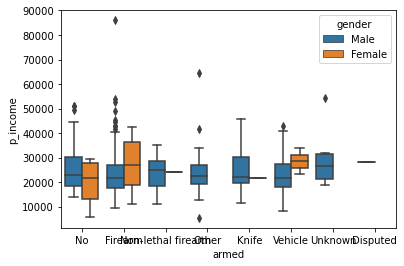

In [277]:
sns.boxplot(x='armed', y='p_income', data=df, hue='gender')

In [295]:
#categorize 'age'

age_labels = [f"{i} - {i+9}" for i in range(10,80,10)]
df['age_group'] = pd.cut(df['age'], range(10, 90, 10), right=False,labels=age_labels)

#categorize 'population'
#age_labels = [f"{i} - {i+9}" for i in range(10,80,10)]
#df['age_group'] = pd.cut(df['age'], range(10, 90, 10), right=False,labels=age_labels)

#categorize 'p_income'
income_labels = [f"{i} - {i+1000}" for i in range(5000,87000,1000)]
df['p_income_bracket'] = pd.cut(df['p_income'], range(5000,88000,1000), right=False, labels=income_labels)

#categorize 'urate'
urate_labels = ['0.0 - 0.05', '0.06 - 0.08', '0.09 - 0.11', '0.12 - 0.15', '0.15 - 0.51']
df['urate_group'] = pd.qcut(x = df['urate'], q= 5, precision = 2, labels=urate_labels)
df

,age,gender,raceethnicity,month,state,cause,armed,pop,share_white,share_black,...,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college,age_group,p_income_bracket,urate_group
0,16,Male,Black,February,AL,Gunshot,No,3779,60.5,30.5,...,54766,0.937936,3.0,3.0,14.1,0.10,0.168510,10 - 19,28000 - 29000,0.09 - 0.11
1,27,Male,White,April,LA,Gunshot,No,2769,53.8,36.2,...,40930,0.683411,2.0,1.0,28.8,0.07,0.111402,20 - 29,14000 - 15000,0.06 - 0.08
2,26,Male,White,March,WI,Gunshot,No,4079,73.8,7.7,...,54930,0.825869,2.0,3.0,14.6,0.17,0.147312,20 - 29,25000 - 26000,0.15 - 0.51
3,25,Male,Hispanic/Latino,March,CA,Gunshot,Firearm,4343,1.2,0.6,...,55909,0.863814,3.0,3.0,11.7,0.12,0.050133,20 - 29,17000 - 18000,0.09 - 0.11
4,29,Male,White,March,OH,Gunshot,No,6809,92.5,1.4,...,49669,1.384868,5.0,4.0,1.9,0.06,0.403954,20 - 29,33000 - 34000,0.0 - 0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,18,Male,Black,April,VA,Gunshot,No,1640,40.9,53.8,...,46166,0.593900,1.0,1.0,35.2,0.15,0.120553,10 - 19,25000 - 26000,0.12 - 0.15
436,28,Male,Native American,April,WA,Taser,Firearm,4154,74.5,0.4,...,40368,0.882085,1.0,2.0,27.3,0.13,0.174525,20 - 29,18000 - 19000,0.12 - 0.15
437,52,Male,White,March,NC,Gunshot,Firearm,3850,83.2,10.1,...,42017,0.909156,2.0,2.0,28.5,0.26,0.072764,50 - 59,21000 - 22000,0.15 - 0.51
438,38,Female,Black,February,CA,Gunshot,Firearm,2544,21.7,24.9,...,72112,0.874362,2.0,4.0,23.9,0.07,0.396476,30 - 39,26000 - 27000,0.06 - 0.08


In [293]:
urate_labels = ['0.0 - 0.05', '0.06 - 0.08', '0.09 - 0.11', '0.12 - 0.15', '0.15 - 0.51']
df2 = df
#df2['urate_group'] = pd.cut(df['urate'], range(0,1, 0.1))
df2['urate_group'] = pd.qcut(x = df2['urate'], q= 5, precision = 2, labels=urate_labels)
df2

,age,gender,raceethnicity,month,state,cause,armed,pop,share_white,share_black,...,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college,age_group,p_income_bracket,urate_group
0,16,Male,Black,February,AL,Gunshot,No,3779,60.5,30.5,...,54766,0.937936,3.0,3.0,14.1,0.10,0.168510,10 - 19,28000 - 29000,"(0.09, 0.12]"
1,27,Male,White,April,LA,Gunshot,No,2769,53.8,36.2,...,40930,0.683411,2.0,1.0,28.8,0.07,0.111402,20 - 29,14000 - 15000,"(0.06, 0.09]"
2,26,Male,White,March,WI,Gunshot,No,4079,73.8,7.7,...,54930,0.825869,2.0,3.0,14.6,0.17,0.147312,20 - 29,25000 - 26000,"(0.16, 0.51]"
3,25,Male,Hispanic/Latino,March,CA,Gunshot,Firearm,4343,1.2,0.6,...,55909,0.863814,3.0,3.0,11.7,0.12,0.050133,20 - 29,17000 - 18000,"(0.09, 0.12]"
4,29,Male,White,March,OH,Gunshot,No,6809,92.5,1.4,...,49669,1.384868,5.0,4.0,1.9,0.06,0.403954,20 - 29,33000 - 34000,"(0.0, 0.06]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,18,Male,Black,April,VA,Gunshot,No,1640,40.9,53.8,...,46166,0.593900,1.0,1.0,35.2,0.15,0.120553,10 - 19,25000 - 26000,"(0.12, 0.16]"
436,28,Male,Native American,April,WA,Taser,Firearm,4154,74.5,0.4,...,40368,0.882085,1.0,2.0,27.3,0.13,0.174525,20 - 29,18000 - 19000,"(0.12, 0.16]"
437,52,Male,White,March,NC,Gunshot,Firearm,3850,83.2,10.1,...,42017,0.909156,2.0,2.0,28.5,0.26,0.072764,50 - 59,21000 - 22000,"(0.16, 0.51]"
438,38,Female,Black,February,CA,Gunshot,Firearm,2544,21.7,24.9,...,72112,0.874362,2.0,4.0,23.9,0.07,0.396476,30 - 39,26000 - 27000,"(0.06, 0.09]"


In [258]:
df['pop_bracket'].value_counts()

(4750, 5000]      30
(4000, 4250]      29
(3500, 3750]      28
(4250, 4500]      27
(5000, 5250]      25
                  ..
(17000, 17250]     0
(17250, 17500]     0
(17500, 17750]     0
(17750, 18000]     0
(26500, 26750]     0
Name: pop_bracket, Length: 107, dtype: int64

In [279]:
df['urate'].min()

0.01

In [280]:
df['urate'].max()

0.51

In [292]:
df2['urate_group'].value_counts()

0.09 - 0.11    94
0.06 - 0.08    90
0.0 - 0.05     89
0.12 - 0.15    82
0.15 - 0.51    81
Name: urate_group, dtype: int64

In [294]:
df2['urate_group'].value_counts()

(0.09, 0.12]    94
(0.06, 0.09]    90
(0.0, 0.06]     89
(0.12, 0.16]    82
(0.16, 0.51]    81
Name: urate_group, dtype: int64